# K-Means Clustering from Sratch

![K-Means Clustering Proccess](https://camo.githubusercontent.com/d191bbb2d798b8add5ca5d1f5b314c567eea5e76/687474703a2f2f6b6f6e756b6f69692e636f6d2f626c6f672f77702d636f6e74656e742f75706c6f6164732f323031372f30312f52756e79616e4b6d65616e732e676966)

## K-Means with set k=2

We will go through the inner workings of k-means clustering and replicate it using only numpy.

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

k = 2

### 1. Initiate Cetnroids

Randomly place cendtroids, on top of some existing datapoints.

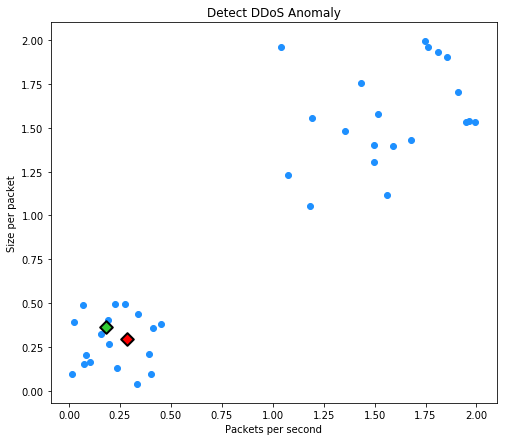

In [83]:
# eucledean distance between points
def eucl_distance(a, b):
    return np.linalg.norm(a-b)

# import data
dataset = np.loadtxt('durudataset.txt')
num_instances, num_features = dataset.shape # dataset has a shape of (40, 2)

# randomly select k centroids' starting ponts (from data)
centroids = dataset[np.random.randint(num_instances, size=k)]

# how much did cetroid move till last iteration
centroids_old = np.zeros(centroids.shape) # define any "centroid_old" matrix
centroids_diff = eucl_distance(centroids, centroids_old)

# which cluster does each datapoint belong to
belongs_to = np.zeros((num_instances, 1))

# plot data & centroids
colors = ['red', 'limegreen']
plt.figure(figsize=(8,7))
plt.scatter(dataset[:,0], dataset[:,1], label='Data', color='dodgerblue')
for i, c in enumerate(centroids):
    plt.scatter(centroids[i,0], centroids[i,1], color=colors[i], marker="D", s=80, edgecolor='black', linewidth='2')
plt.title('Detect DDoS Anomaly')
plt.xlabel('Packets per second')
plt.ylabel('Size per packet')

plt.show()

### 2. Assign Clusters

List the index of the datapoints that belong to each cluster. 

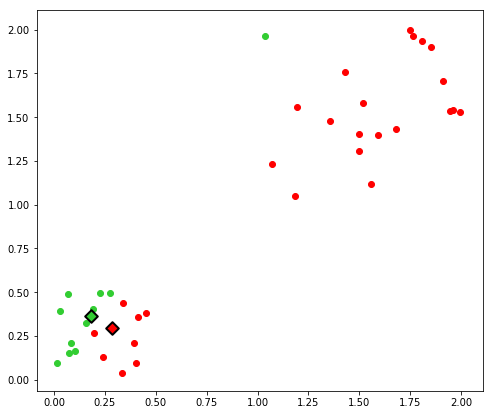

In [84]:
for index_data, data in enumerate(dataset):
    
    # an array of all centroid distances per data point (to find min)
    dist_vec = np.zeros((k,1))
    
    for index_centroids, centroid in enumerate(centroids):
        
        # populate distance vectors of all centroids for that data point
        dist_vec[index_centroids] = eucl_distance(centroid, data)
    
    # find which centroid is closest to that data point (which cluster that datapoint belongs to)
    belongs_to[index_data] = np.argmin(dist_vec) # argmin returns indices, not values
        
# plot clusters
colors = ['red', 'limegreen']
plt.figure(figsize=(8,7))

for i, b in enumerate(belongs_to):
    plt.scatter(dataset[i,0], dataset[i,1], color=colors[int(b)])
for i, c in enumerate(centroids):
    plt.scatter(centroids[i,0], centroids[i,1], color=colors[i], marker="D", s=80, edgecolor='black', linewidth='2')

plt.show()

### 3. Update centroids

Find the mean of each cluster and move its corresponding centroid to that point.


Cluster 1 contains datapoints [3, 4, 5, 8, 9, 12, 13, 14, 16, 17, 19, 29].
Its updated centroid position is at [0.20385818 0.46199778].


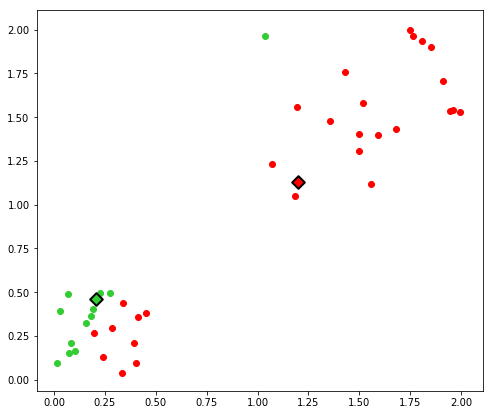

In [85]:
# relocate centroids to the mean of their respective clusters
# find the indices of the datapoits that belong to each cluster
for index in range(len(centroids)):
    instances = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
    centroids[index] = np.mean(dataset[instances], axis=0)
    
print('\nCluster {} contains datapoints {}.\nIts updated centroid position is at {}.'
      .format(index, instances, centroids[index]))

# plot updated centroids
colors = ['red', 'limegreen']
plt.figure(figsize=(8,7))

for i, b in enumerate(belongs_to):
    plt.scatter(dataset[i,0], dataset[i,1], color=colors[int(b)])
for i, c in enumerate(centroids):
    plt.scatter(centroids[i,0], centroids[i,1], color=colors[i], marker="D", s=80, edgecolor='black', linewidth='2')

plt.show()

### 4. Repeat

Repeat steps 2 and 3 until centroid stabilization is achieved. Namely, when all ceontroids stay in place after an update. 

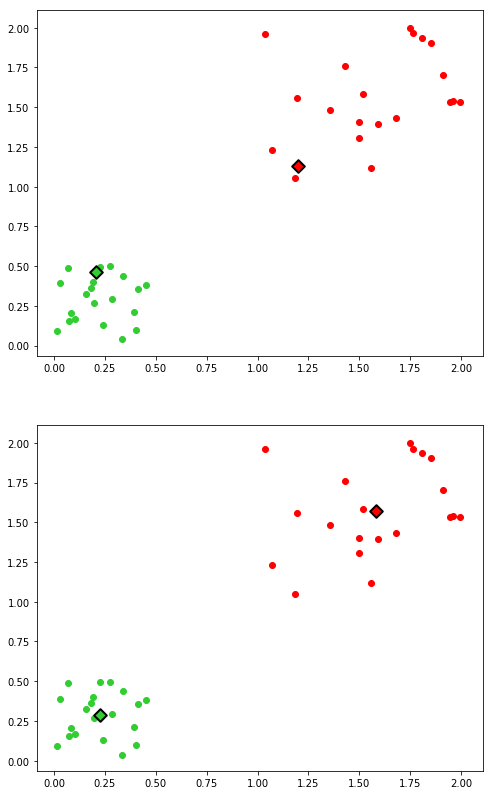

In [86]:
for index_data, data in enumerate(dataset):
    
    # an array of all centroid distances per data point (to find min)
    dist_vec = np.zeros((k,1))
    
    for index_centroids, centroid in enumerate(centroids):
        
        # populate distance vectors of all centroids for that data point
        dist_vec[index_centroids] = eucl_distance(centroid, data)
    
    # find which centroid is closest to that data point (which cluster that datapoint belongs to)
    belongs_to[index_data] = np.argmin(dist_vec) # argmin returns indices, not values
        
# plot clusters
colors = ['red', 'limegreen']
fig = plt.figure(figsize=(8,14))
ax = fig.add_subplot(211)

for i, b in enumerate(belongs_to):
    ax.scatter(dataset[i,0], dataset[i,1], color=colors[int(b)])
for i, c in enumerate(centroids):
    ax.scatter(centroids[i,0], centroids[i,1], color=colors[i], marker="D", s=80, edgecolor='black', linewidth='2')
for index in range(len(centroids)):
    instances = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
    centroids[index] = np.mean(dataset[instances], axis=0)

# plot updated centroids
ax2 = fig.add_subplot(212)

for i, b in enumerate(belongs_to):
    ax2.scatter(dataset[i,0], dataset[i,1], color=colors[int(b)])
for i, c in enumerate(centroids):
    ax2.scatter(centroids[i,0], centroids[i,1], color=colors[i], marker="D", s=80, edgecolor='black', linewidth='2')

plt.show()

### 5. Centroid stabilization - END

At this point the centroids are positioned at the mean of their respective clusters and thus the K-Means search is terminated.

In [95]:
# datapoints per cluster
for i in range(len(belongs_to)):
    if i%5 == 0:
        print('Datapoint {} belongs to cluster {}\n...'.format(i, int(belongs_to[i])))

Datapoint 0 belongs to cluster 1
...
Datapoint 5 belongs to cluster 1
...
Datapoint 10 belongs to cluster 1
...
Datapoint 15 belongs to cluster 1
...
Datapoint 20 belongs to cluster 0
...
Datapoint 25 belongs to cluster 0
...
Datapoint 30 belongs to cluster 0
...
Datapoint 35 belongs to cluster 0
...


## The Elbow Method

What happens if we do not know k beforehand? The solution to this is to use a method called "The Elbow Method" and goes as follows. We start with a k=1 and we compute the sum of all eucledean distances of each datapoint from its corresponding centroid. We repeat for k=2 etc. Finally, we compare the sum-of-errors of all the different values of k and select the k that precedes the phase of very slow error decrease.

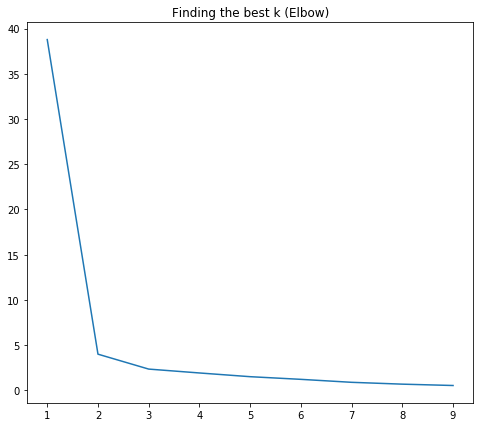

In [114]:
from sklearn.cluster import KMeans

errors = []

for i in range(1, 10):
    # keep starting state the same for all 10 examples
    clf = KMeans(n_clusters=i, init="k-means++", n_init=10, random_state=0)
    clf.fit(dataset)

    # Sum of squared distances of samples to their closest cluster center.
    errors.append(clf.inertia_)

plt.figure(figsize=(8,7))
plt.plot(range(1, 10), errors)
plt.title("Finding the best k (Elbow)")

plt.show()

Two things become obvious:

1. The best k is at value 2, as the error decreases very slowly after that
2. Why this method is called "elbow" method